In [261]:
#Importing required libraries here
!pip install -U scikit-learn
!pip install --upgrade pandas --user
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder

# Data/Domain Understanding and Exploration

## Meaning and Type of Features; Analysis of Univariate Distributions

In [414]:
import pandas as pd
dataset = pd.read_csv('https://raw.githubusercontent.com/nehahussain/Ds_ML_dataset/main/adverts.csv')

print('Total number of columns: ' + str(dataset.shape[1]) + "\n" + "Total number of rows: " + str(dataset.shape[0]))
print(dataset.info())

Total number of columns: 12
Total number of rows: 402005
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB
None


In [415]:
pd.set_option('display.float_format', '{:.2f}'.format)
dataset[['mileage', 'year_of_registration', 'price']].describe()

,mileage,year_of_registration,price
count,401878.00,368694.00,402005.00
mean,37743.60,2015.01,17341.97
std,34831.72,7.96,46437.46
min,0.00,999.00,120.00
25%,10481.00,2013.00,7495.00
50%,28629.50,2016.00,12600.00
75%,56875.75,2018.00,20000.00
max,999999.00,2020.00,9999999.00


In [416]:
categorical_features = ['reg_code', 'standard_colour', 'standard_make', 'standard_model', 
             'vehicle_condition', 'body_type', 'crossover_car_and_van', 'fuel_type']
dataset[categorical_features].describe()

,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,body_type,crossover_car_and_van,fuel_type
count,370148,396627,402005,402005,402005,401168,402005,401404
unique,72,22,110,1168,2,16,2,9
top,17,Black,BMW,Golf,USED,Hatchback,False,Petrol
freq,36738,86287,37376,11583,370756,167315,400210,216929


In [417]:
dataset.isnull().sum()

public_reference             0
mileage                    127
reg_code                 31857
standard_colour           5378
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     33311
price                        0
body_type                  837
crossover_car_and_van        0
fuel_type                  601
dtype: int64

public_reference

In [418]:
# this code statement helps us to find if there are any duplicate values in the column
pd.Series(dataset['public_reference']).is_unique

True

### mileage

C:\Users\Neha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


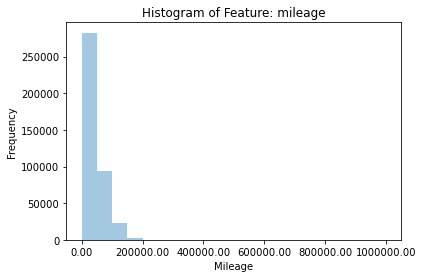

Summary statistics for feature: mileage
count   401878.00
mean     37743.60
std      34831.72
min          0.00
25%      10481.00
50%      28629.50
75%      56875.75
max     999999.00
Name: mileage, dtype: float64


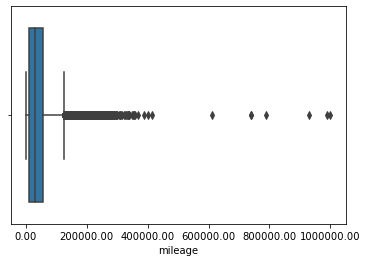

In [419]:
feature = 'mileage'
# Create a histogram of the data
sns.distplot(dataset[feature], kde=False, bins=20)

# Add labels and show plot
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.title('Histogram of Feature: ' + feature)
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
plt.show()

# Calculate summary statistics
print("Summary statistics for feature: "+ feature)
print(dataset[feature].describe())

sns.boxplot(x=dataset[feature])
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
plt.show()

### reg_code

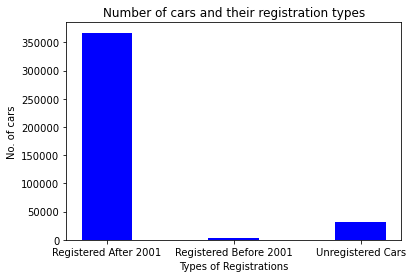

Total entries: 402005
Unregistered cars: 31857
Cars registered after 2001: 367233
Cars registered before 2001: 2915


In [420]:
import matplotlib.pyplot as plt

df_not_null = dataset[dataset['reg_code'].notnull() == True]
df_null = dataset[dataset['reg_code'].isna() == True]
df_alpha = df_not_null[df_not_null['reg_code'].str.isdigit() == False]
df_digits = df_not_null[df_not_null['reg_code'].str.isdigit() == True]

x_label = ['Registered After 2001', 'Registered Before 2001', 'Unregistered Cars']
y_label = [df_digits["reg_code"].count(), df_alpha["reg_code"].count(), df_null['reg_code'].isna().count()]
plt.bar(x_label, y_label, color ='blue',
        width = 0.4)
plt.xlabel("Types of Registrations")
plt.ylabel("No. of cars")
plt.title("Number of cars and their registration types")
plt.show()
print("Total entries: " + str(dataset.shape[0]))
print("Unregistered cars: " + str(df_null['reg_code'].isna().count()))
print("Cars registered after 2001: " + str(df_digits["reg_code"].count()))
print("Cars registered before 2001: " + str(df_alpha["reg_code"].count()))

### standard_colour

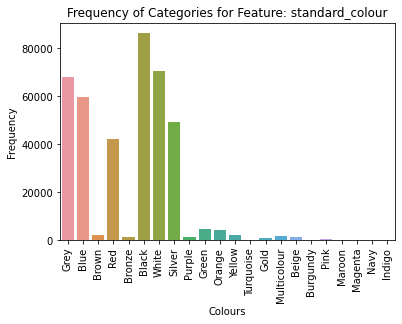

Missing values: 5378
count     396627
unique        22
top        Black
freq       86287
Name: standard_colour, dtype: object


In [421]:
# Create a bar plot of the frequency of each category
sns.countplot(x=dataset["standard_colour"])

# Add labels and show plot
plt.xlabel('Colours')
plt.ylabel('Frequency')
plt.title('Frequency of Categories for Feature: standard_colour')
plt.xticks(rotation=90)
plt.show()

print(f"Missing values: {dataset['standard_colour'].isnull().sum()}")
print(dataset['standard_colour'].describe())

### standard_make

No. of manufacturers: 110


C:\Users\Neha\AppData\Local\Temp\ipykernel_4548\4184693880.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=x_label,rotation=90);


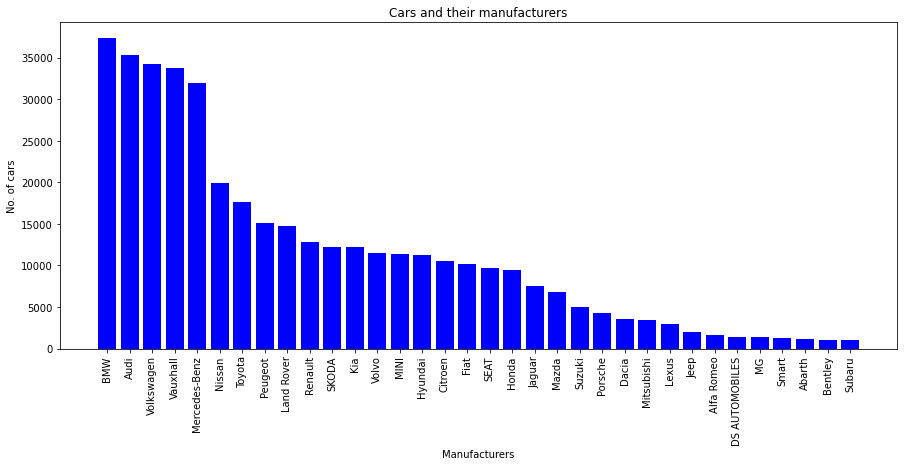

In [422]:
vc = dataset['standard_make'].value_counts()
print("No. of manufacturers: " + str(len(vc)))
vc.index = vc.index.astype(str)
vc_dict = vc.to_dict()
x_label = []
y_label = []
for key in vc_dict.keys():
    if vc_dict[key] > 1000:
        x_label.append(key)
        y_label.append(vc_dict[key])

plt.figure(figsize=(15, 6))
plt.bar(x_label, y_label, color ='blue',
        width = 0.8)
ax = plt.gca()
ax.set_xticklabels(labels=x_label,rotation=90);
plt.xlabel("Manufacturers")
plt.ylabel("No. of cars")
plt.title("Cars and their manufacturers")
plt.show()

### standard_model

In [423]:
dataset['standard_model'].value_counts()
dataset.groupby(['standard_make','standard_model'])
group_size = dataset.groupby(['standard_make','standard_model']).size()
group_size.sort_values(ascending=False)

standard_make  standard_model
Volkswagen     Golf              11583
Vauxhall       Corsa             10646
Mercedes-Benz  C Class            8550
BMW            3 Series           8347
Volkswagen     Polo               7681
                                 ...  
Toyota         Mark II Blitz         1
GMC            Pickup                1
Fiat           Uno                   1
Toyota         Paseo                 1
Porsche        917                   1
Length: 1217, dtype: int64

### vehicle_condition

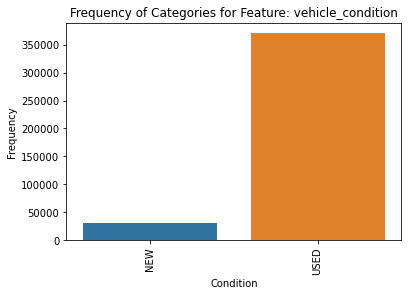

count     402005
unique         2
top         USED
freq      370756
Name: vehicle_condition, dtype: object
USED    370756
NEW      31249
Name: vehicle_condition, dtype: int64


In [424]:
# Create a bar plot of the frequency of each category
sns.countplot(x=dataset["vehicle_condition"])

# Add labels and show plot
plt.xlabel('Condition')
plt.ylabel('Frequency')
plt.title('Frequency of Categories for Feature: vehicle_condition')
plt.xticks(rotation=90)
plt.show()

print(dataset['vehicle_condition'].describe())
print(dataset['vehicle_condition'].value_counts())

### year_of_registration

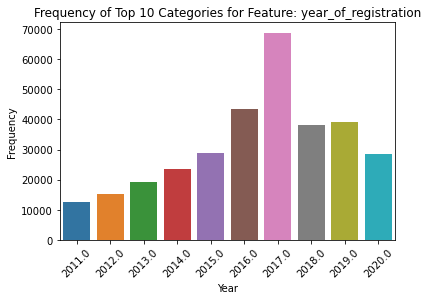

Summary statistics for feature: year_of_registration
count   368694.00
mean      2015.01
std          7.96
min        999.00
25%       2013.00
50%       2016.00
75%       2018.00
max       2020.00
Name: year_of_registration, dtype: float64


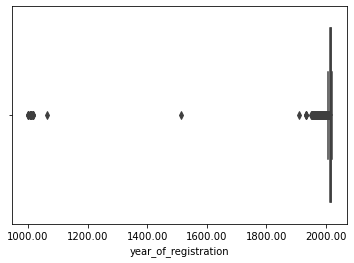

2017.00    68790
2016.00    43483
2019.00    39236
2018.00    38300
2015.00    29019
           ...  
1018.00        1
1006.00        1
1008.00        1
1515.00        1
1015.00        1
Name: year_of_registration, Length: 84, dtype: int64

In [425]:
feature = 'year_of_registration'
top_10 = dataset[feature].value_counts().head(10)

# Create a bar plot of the frequency of each category
sns.barplot(x=top_10.index, y=top_10.values)

# Add labels and show plot
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.title('Frequency of Top 10 Categories for Feature: ' + feature)
plt.show()

# Calculate summary statistics
print("Summary statistics for feature: "+ feature)
print(dataset[feature].describe())

sns.boxplot(x=dataset[feature])
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
plt.show()

vc = dataset['year_of_registration'].value_counts()
vc.sort_values(ascending=False)

### body_type

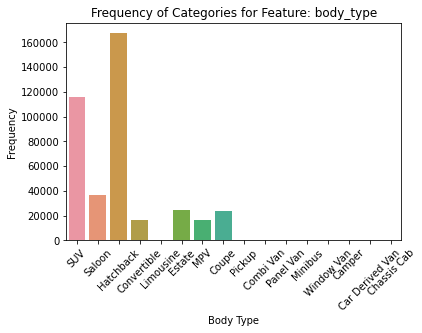

In [426]:
# Create a bar plot of the frequency of each body type
sns.countplot(x=dataset["body_type"])

# Add labels and show plot
plt.xlabel('Body Type')
plt.ylabel('Frequency')
plt.title('Frequency of Categories for Feature: body_type')
plt.xticks(rotation=45)
plt.show()

### crossover_car_and_van

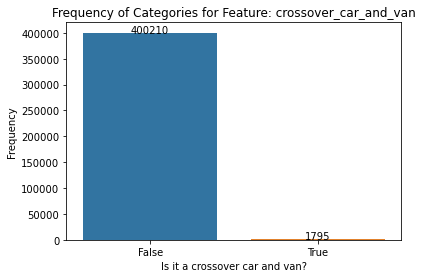

In [427]:
# Create a bar plot of the frequency of each body type
ax = sns.countplot(x=dataset["crossover_car_and_van"])

# Add labels and show plot
plt.xlabel('Is it a crossover car and van?')
plt.ylabel('Frequency')
plt.title('Frequency of Categories for Feature: crossover_car_and_van')

# Get the frequency of each value in the feature column
value_counts = dataset["crossover_car_and_van"].value_counts()

# loop through the items and access the index and count of each bar
for i, v in value_counts.items():
    ax.text(i, v, v, ha='center')
    
plt.show()

### fuel_type

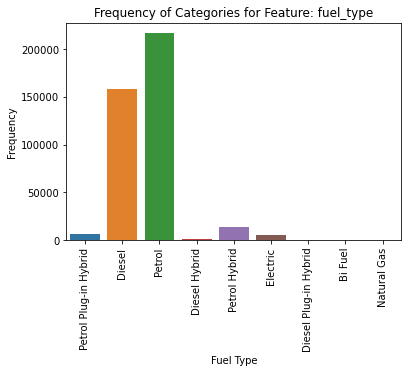

In [428]:
# Create a bar plot of the frequency of each body type
ax = sns.countplot(x=dataset["fuel_type"])

# Add labels and show plot
plt.xlabel('Fuel Type')
plt.ylabel('Frequency')
plt.title('Frequency of Categories for Feature: fuel_type')
plt.xticks(rotation=90)

plt.show()

### price

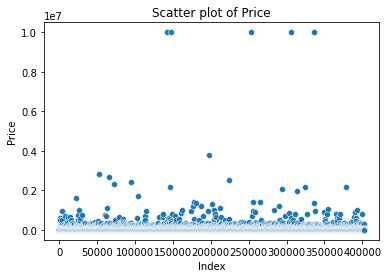

count    402005.00
mean      17341.97
std       46437.46
min         120.00
25%        7495.00
50%       12600.00
75%       20000.00
max     9999999.00
Name: price, dtype: float64


In [429]:
sns.scatterplot(data=dataset, x=dataset.index, y='price')
# sns.scatterplot(data=test_df, x=test_df['mileage'], y='price')

# Add labels and show plot
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Scatter plot of Price')
plt.show()

print(dataset['price'].describe())

## Feature Importance

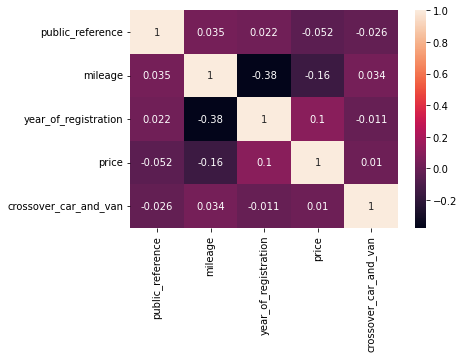

In [430]:
corr = dataset.corr(numeric_only=True)

# Create a heatmap of the correlation matrix
sns.heatmap(corr, annot=True)

# Show the plot
plt.show()

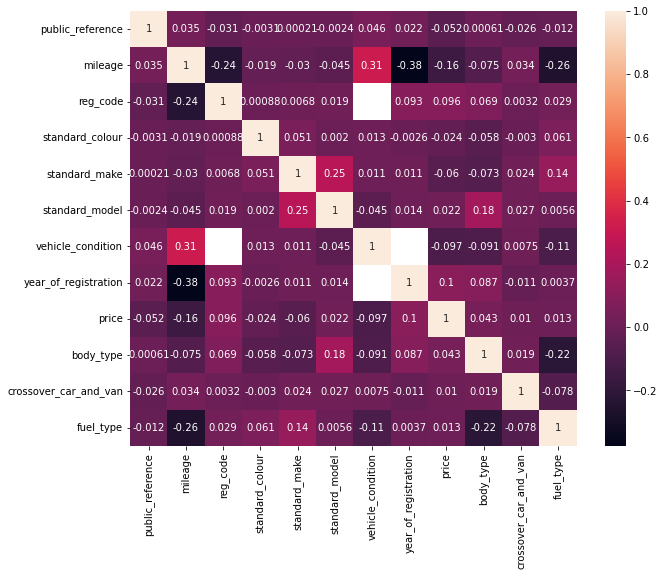

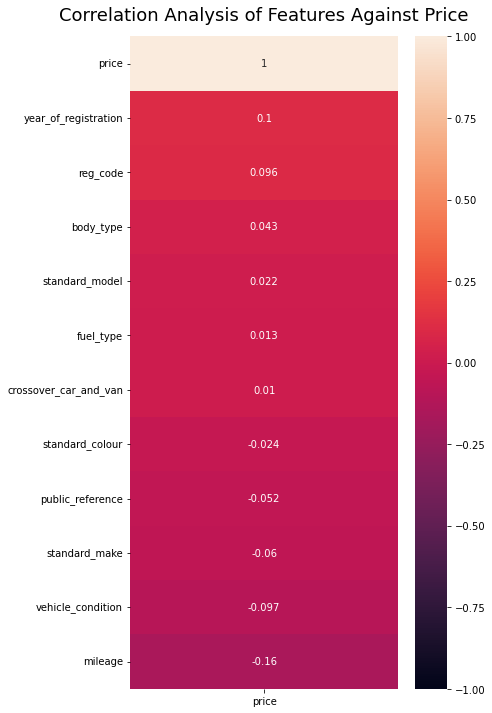

In [431]:
def encoder_function(feature_name: str, df):
    encoder = OrdinalEncoder()
    df[feature_name] = encoder.fit_transform(df[feature_name].values.reshape(-1,1))

dataset_encoded = dataset.copy(deep=True)
encoder_function('reg_code', dataset_encoded)
encoder_function('standard_colour', dataset_encoded)
encoder_function('standard_make', dataset_encoded)
encoder_function('standard_model', dataset_encoded)
encoder_function('vehicle_condition', dataset_encoded)
encoder_function('body_type', dataset_encoded)
encoder_function('vehicle_condition', dataset_encoded)
encoder_function('fuel_type', dataset_encoded)

corr = dataset_encoded.corr(numeric_only=False)
# Create a heatmap of the correlation matrix
from matplotlib.pyplot import figure
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr, annot=True, ax=ax)

plt.figure(figsize=(6, 12))
heatmap = sns.heatmap(dataset_encoded.corr()[['price']].sort_values(by='price', ascending=False), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Analysis of Features Against Price', fontdict={'fontsize':18}, pad=16)

# Show the plot
plt.show()


## Data Processing for Machine Learning

### Detection of Erroneous and Missing Values

In [432]:
dataset[(dataset['reg_code'].isna() == True) & (dataset['vehicle_condition'] == 'USED')]

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
630,202010275479166,54000.00,NaN,White,Toyota,Prius+,USED,2019.00,10900,MPV,False,Petrol Hybrid
682,202006019703585,103450.00,NaN,Bronze,BMW,3 Series,USED,2006.00,6000,Convertible,False,Petrol
1131,202009274274693,74000.00,NaN,Silver,Mercedes-Benz,SL Class,USED,2004.00,15950,Convertible,False,Petrol
1194,202010114878094,13000.00,NaN,White,Ferrari,599,USED,2017.00,79949,Coupe,False,Petrol
1335,202004018824812,76000.00,NaN,White,Aston Martin,DB4,USED,2018.00,495000,Saloon,False,Petrol
...,...,...,...,...,...,...,...,...,...,...,...,...
397788,202009214000713,119400.00,NaN,White,Toyota,Prius,USED,2017.00,8995,Hatchback,False,Petrol Hybrid
397947,202010265437718,147898.00,NaN,Blue,Toyota,Prado,USED,2005.00,3250,Estate,False,Diesel
398865,202010074728813,74500.00,NaN,Silver,Toyota,Sienta,USED,2020.00,4250,MPV,False,Petrol
399728,202008262969804,12812.00,NaN,Silver,Rolls-Royce,Wraith,USED,NaN,159950,Coupe,False,Petrol


In [433]:
dataset[dataset['standard_colour'].isna() == True].shape[0]

5378

In [434]:
dataset[dataset['standard_make'].isna() == True].shape[0]

0

In [435]:
dataset[dataset['standard_model'].isna() == True].shape[0]

0

In [436]:
dataset[dataset['vehicle_condition'].isna() == True].shape[0]

0

In [437]:
dataset[(dataset['year_of_registration'].isna() == True) & (dataset['vehicle_condition'] == 'USED')]

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
54,202007030806426,30000.00,18,Red,Vauxhall,Insignia,USED,NaN,11990,Hatchback,False,Petrol
83,202008222801747,42847.00,61,Red,Honda,Jazz,USED,NaN,5695,Hatchback,False,Petrol
865,202010084741550,43130.00,66,White,Land Rover,Range Rover Sport,USED,NaN,35990,SUV,False,Diesel
968,202010305607535,63369.00,17,Blue,SKODA,Rapid Spaceback,USED,NaN,7490,Hatchback,False,Diesel
1256,202010225294466,18715.00,68,White,Volvo,V40,USED,NaN,16950,NaN,False,Petrol
...,...,...,...,...,...,...,...,...,...,...,...,...
400536,202010094805399,40523.00,NaN,Red,Peugeot,108,USED,NaN,5999,Hatchback,False,Petrol
400725,202008252905656,45.00,20,Silver,Land Rover,Range Rover Evoque,USED,NaN,46945,SUV,False,Diesel
401314,202010315635541,12522.00,67,Red,Dacia,Sandero,USED,NaN,6300,Hatchback,False,Petrol
401323,201909222504136,46000.00,13,Grey,Volkswagen,Caravelle,USED,NaN,22995,MPV,False,Diesel


In [438]:
dataset[(dataset['year_of_registration'].isna() == True) & (dataset['vehicle_condition'] == 'USED') & 
        (dataset['reg_code'].isna() == True)]

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
1510,202010054642656,13406.00,NaN,White,Land Rover,Range Rover Evoque,USED,NaN,26000,Coupe,False,Diesel
2631,202010235350805,1000.00,NaN,Blue,Maserati,Levante,USED,NaN,63995,SUV,False,Petrol
4766,202003238706011,NaN,NaN,Grey,Subaru,Outback,USED,NaN,35995,Estate,False,Petrol
6998,202010225284269,160.00,NaN,Grey,McLaren,Senna,USED,NaN,699950,Coupe,False,Petrol
7517,202009234093511,11413.00,NaN,NaN,MINI,Convertible,USED,NaN,14400,Convertible,False,Diesel
...,...,...,...,...,...,...,...,...,...,...,...,...
392499,202010064681927,83555.00,NaN,Black,Land Rover,Range Rover Sport,USED,NaN,30995,SUV,False,Diesel
392730,202009093528195,38796.00,NaN,Grey,Rover,110,USED,NaN,3150,Saloon,False,Petrol
396985,202001256559400,29000.00,NaN,Black,Lamborghini,Gallardo,USED,NaN,77990,Coupe,False,Petrol
399728,202008262969804,12812.00,NaN,Silver,Rolls-Royce,Wraith,USED,NaN,159950,Coupe,False,Petrol


In [439]:
dataset[dataset['body_type'].isna() == True]

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
307,202010245377951,33287.00,63,Red,Volkswagen,Caddy,USED,2013.00,10990,NaN,False,Diesel
625,202010255419023,55000.00,65,Grey,Vauxhall,Vivaro,USED,2015.00,10995,NaN,False,Diesel
1256,202010225294466,18715.00,68,White,Volvo,V40,USED,NaN,16950,NaN,False,Petrol
1643,202010305596351,24920.00,17,Blue,BMW,4 Series,USED,2017.00,21980,NaN,False,Diesel
1929,202010155047896,10.00,70,Blue,Lotus,Elise,USED,2020.00,47775,NaN,False,Petrol
...,...,...,...,...,...,...,...,...,...,...,...,...
399677,202007111130539,5001.00,20,Black,Mercedes-Benz,GLC Class,USED,2020.00,36870,NaN,False,Diesel
400624,202010285545599,322000.00,05,Black,London Taxis International,TXI,USED,2005.00,995,NaN,False,Diesel
400643,202011015665976,10.00,NaN,White,Audi,A3,NEW,NaN,27845,NaN,False,Petrol
400724,202008242879192,0.00,L,Silver,Porsche,911,USED,1973.00,175000,NaN,False,Petrol


In [440]:
dataset[dataset['crossover_car_and_van'].isna() == True].shape[0]

0

In [441]:
print(f"{dataset[dataset['fuel_type'].isna() == True].shape[0]} records have null values in fuel_type column")
dataset[dataset['fuel_type'].isna() == True]

601 records have null values in fuel_type column


,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
1309,202010305621511,10.00,NaN,Black,BMW,5 Series,NEW,NaN,51395,Estate,False,NaN
2059,202003128359933,0.00,NaN,NaN,Jaguar,XF,NEW,NaN,35990,Estate,False,NaN
2666,202010305598848,10.00,NaN,Grey,Volvo,V60,NEW,NaN,31414,Estate,False,NaN
3724,202005129287540,61568.00,14,Silver,Toyota,Prius,USED,2020.00,7995,Hatchback,False,NaN
4027,202010295581781,10.00,NaN,Black,Mercedes-Benz,A Class,NEW,NaN,36584,Hatchback,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
398867,202010074730787,0.00,NaN,NaN,Jaguar,XF,NEW,NaN,32585,Saloon,False,NaN
399004,202010315654843,1.00,NaN,Black,Peugeot,508,NEW,NaN,39135,Hatchback,False,NaN
399025,202005289599976,17.00,19,NaN,McLaren,Senna,USED,2019.00,799900,NaN,False,NaN
399736,202009033258549,10.00,NaN,Black,Vauxhall,Grandland X,NEW,NaN,31190,SUV,False,NaN


In [442]:
dataset[dataset['year_of_registration'] >= 2000]

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
1,202007020778260,108230.00,61,Blue,Jaguar,XF,USED,2011.00,7000,Saloon,False,Diesel
2,202007020778474,7800.00,17,Grey,SKODA,Yeti,USED,2017.00,14000,SUV,False,Petrol
3,202007080986776,45000.00,16,Brown,Vauxhall,Mokka,USED,2016.00,7995,Hatchback,False,Diesel
4,202007161321269,64000.00,64,Grey,Land Rover,Range Rover Sport,USED,2015.00,26995,SUV,False,Diesel
5,202009304412074,16000.00,17,Blue,Audi,S5,USED,2017.00,29000,Convertible,False,Petrol
...,...,...,...,...,...,...,...,...,...,...,...,...
402000,202010315652942,5179.00,69,Grey,Peugeot,208,USED,2019.00,10595,Hatchback,False,Petrol
402001,202010315657341,110000.00,59,Red,Peugeot,107,USED,2009.00,2000,Hatchback,False,Petrol
402002,202010315659271,52760.00,62,White,Nissan,Qashqai,USED,2012.00,7250,SUV,False,Petrol
402003,202011015662436,10250.00,65,Red,Abarth,595,USED,2015.00,11490,Hatchback,False,Petrol


In [443]:
dataset['year_of_registration'].unique()

array([  nan, 2011., 2017., 2016., 2015., 2013., 2008., 2019., 2010.,
       2012., 2018., 2009., 1984., 2014., 2003., 2006., 2020., 2005.,
       2000., 2002., 2007., 2004., 1991., 2001., 1986., 1998., 1990.,
       1993., 1987., 1994., 1999., 1970., 1988., 1995., 1997., 1969.,
       1992., 1989., 1996., 1976., 1983., 1980., 1973., 1962., 1967.,
       1972., 1982., 1968., 1979., 1964., 1933., 1981., 1985., 1978.,
       1971., 1974., 1966., 1977., 1961., 1965., 1007., 1957., 1515.,
       1963., 1063., 1954., 1975., 1955., 1009., 1016., 1960., 1956.,
       1959., 1909., 1934., 1958., 1010., 1950., 1008., 1018.,  999.,
       1017., 1952., 1006., 1015.])

## Handling Nulls and Outliers

In [444]:
print("Records with null mileage value: " + str(dataset[dataset["mileage"].isna() == True].shape[0]))
print("Skewness in mileage column: " + 
      str(dataset['mileage'].skew(axis=0, skipna=True).round(decimals=2)))
# As the mileage column is skewed, we will need to use median to fill the NaN (null) values
print(dataset['mileage'].median())

Records with null mileage value: 127
Skewness in mileage column: 1.45
28629.5


In [445]:
print("Records with null year_of_registration value: " 
      + str(dataset[(dataset["year_of_registration"].isna() == True) 
                    & (dataset["vehicle_condition"] == "USED")].shape[0]))
print("Skewness in year_of_registration column: " + 
      str(dataset['year_of_registration'].skew(axis=0, skipna=True).round(decimals=2)))
# As the year_of_registration column is skewed, we will need to use median to fill the NaN (null) values
print(dataset['year_of_registration'].median())

Records with null year_of_registration value: 2062
Skewness in year_of_registration column: -87.91
2016.0


In [446]:
# Fixing year_of_registration column
reg_code_mapping = {
    '02': 2002,'03': 2003,'04': 2004,'05': 2005,'06': 2006,'07': 2007,'08': 2008,'09': 2009,
    '10': 2010,'11': 2011,'12': 2012,'13': 2013,'14': 2014,'15': 2015,'16': 2016,'17': 2017,'18': 2018,'19': 2019,'20': 2020,
    '51': 2001,'52': 2002, '53': 2003,'54': 2004,'55': 2005,'56': 2006,'57': 2007,'58': 2008,'59': 2009,
    '60': 2010,'61': 2011,'62': 2012,'63': 2013,'64': 2014,'65': 2015,'66': 2016,'67': 2017,'68': 2018,'69': 2019,'70': 2020
}

for index, row in dataset.iterrows():
    if row['reg_code'] in reg_code_mapping:
        dataset.at[index, 'year_of_registration'] = reg_code_mapping[row['reg_code']]

In [447]:
for index, row in dataset.iterrows():
    if pd.isnull(row['year_of_registration']) and row['vehicle_condition'] == 'USED':
        dataset.at[index, 'year_of_registration'] = 2016

# dataset[(dataset['year_of_registration'].isna() == True) & (dataset['vehicle_condition'].isna() == 'USED')]
# the above statement will give empty dataframe to show no missing year_of_registration values for used vehicles

In [448]:
# # Select categorical columns
# categorical_cols = dataset.select_dtypes(include=['object']).columns

# # define the threshold for low frequency values
# threshold = 10

# # Iterate over the categorical columns
# for col in categorical_cols:
#     # Identify the values that occur with low frequency
#     outliers = dataset[col].value_counts()[dataset[col].value_counts() < threshold].index
    
#     # Replace low frequency values with NaN
#     dataset[col].replace(outliers, np.nan, inplace=True)

In [449]:
print("Mode of standard_colour: " + str(dataset['standard_colour'].mode()[0]))
print("\nMode of body_type: " + str(dataset['body_type'].mode()[0]))
print("\nMode of fuel_type: " + str(dataset['fuel_type'].mode()[0]))
print("\nMode of reg_code: " + str(dataset['reg_code'].mode()[0]))

Mode of standard_colour: Black

Mode of body_type: Hatchback

Mode of fuel_type: Petrol

Mode of reg_code: 17


In [450]:
# # this statement drops the six records with the missing values and the erroneous price
# dataset.drop(dataset[dataset['price'] == 9999999].index, inplace=True)

In [451]:
#Resetting index after dropping rows
dataset.reset_index()

,index,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,0,202006039777689,0.00,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,1,202007020778260,108230.00,61,Blue,Jaguar,XF,USED,2011.00,7000,Saloon,False,Diesel
2,2,202007020778474,7800.00,17,Grey,SKODA,Yeti,USED,2017.00,14000,SUV,False,Petrol
3,3,202007080986776,45000.00,16,Brown,Vauxhall,Mokka,USED,2016.00,7995,Hatchback,False,Diesel
4,4,202007161321269,64000.00,64,Grey,Land Rover,Range Rover Sport,USED,2014.00,26995,SUV,False,Diesel
...,...,...,...,...,...,...,...,...,...,...,...,...,...
402000,402000,202010315652942,5179.00,69,Grey,Peugeot,208,USED,2019.00,10595,Hatchback,False,Petrol
402001,402001,202010315657341,110000.00,59,Red,Peugeot,107,USED,2009.00,2000,Hatchback,False,Petrol
402002,402002,202010315659271,52760.00,62,White,Nissan,Qashqai,USED,2012.00,7250,SUV,False,Petrol
402003,402003,202011015662436,10250.00,65,Red,Abarth,595,USED,2015.00,11490,Hatchback,False,Petrol


In [452]:
dataset = dataset.fillna({'mileage': dataset['mileage'].median(), 'standard_colour': 'Black', 
               'body_type': 'Hatchback', 'fuel_type': 'Petrol'})

In [453]:
dataset.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.00,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.00,61,Blue,Jaguar,XF,USED,2011.00,7000,Saloon,False,Diesel
2,202007020778474,7800.00,17,Grey,SKODA,Yeti,USED,2017.00,14000,SUV,False,Petrol
3,202007080986776,45000.00,16,Brown,Vauxhall,Mokka,USED,2016.00,7995,Hatchback,False,Diesel
4,202007161321269,64000.00,64,Grey,Land Rover,Range Rover Sport,USED,2014.00,26995,SUV,False,Diesel


In [454]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                402005 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        402005 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   370756 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              402005 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              402005 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB


In [455]:
# Calculate Interquartile Range for mileage and price to deal with outliers
mileage_Q1 = dataset['mileage'].quantile(0.25)
mileage_Q3 = dataset['mileage'].quantile(0.75)
mileage_IQR = mileage_Q3 - mileage_Q1

price_Q1 = dataset['price'].quantile(0.25)
price_Q3 = dataset['price'].quantile(0.75)
price_IQR = price_Q3 - price_Q1

# Find the lower and upper bounds for outliers
mileage_lower_bound = mileage_Q1 - 1.5 * mileage_IQR
mileage_upper_bound = mileage_Q3 + 1.5 * mileage_IQR

price_lower_bound = price_Q1 - 1.5 * price_IQR
price_upper_bound = price_Q3 + 1.5 * price_IQR

# Filter out the outliers in mileage and price
dataset = dataset[(dataset['mileage'] > mileage_lower_bound) & (dataset['mileage'] < mileage_upper_bound) & (dataset['price'] > price_lower_bound) & (dataset['price'] < price_upper_bound)]

## Ordinal Encoding Categorical Columns

In [456]:
encoder_function('reg_code', dataset)
encoder_function('standard_colour', dataset)
encoder_function('standard_make', dataset)
encoder_function('standard_model', dataset)
encoder_function('vehicle_condition', dataset)
encoder_function('body_type', dataset)
encoder_function('vehicle_condition', dataset)
encoder_function('fuel_type', dataset)

## Normalizing price and mileage

In [457]:
dataset_normalized=dataset.copy(deep=True)
dataset_normalized['mileage'] = (dataset_normalized['mileage'] - dataset_normalized['mileage'].min()) / (dataset_normalized['mileage'].max() - dataset_normalized['mileage'].min())    
dataset_normalized['price'] = (dataset_normalized['price'] - dataset_normalized['price'].min()) / (dataset_normalized['price'].max() - dataset_normalized['price'].min())    

In [458]:
dataset_normalized[['mileage', 'price']].describe()

,mileage,price
count,367557.00,367557.00
mean,0.29,0.35
std,0.24,0.21
min,0.00,0.00
25%,0.10,0.19
50%,0.24,0.31
75%,0.45,0.48
max,1.00,1.00


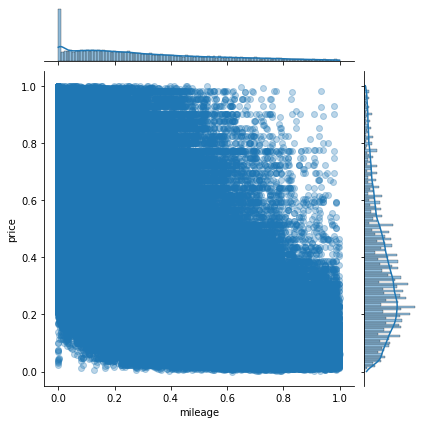

In [459]:
sns.jointplot(data=dataset_normalized, x='mileage', y='price', kind='reg', scatter_kws=dict(alpha=0.3));

In [460]:
# Update the reg_code column where mileage is 0 
dataset['reg_code'] = np.where(dataset.mileage == 0, 0, dataset['reg_code'])

# Update the year_of_registration column where mileage is 0
dataset['year_of_registration'] = np.where(dataset.mileage == 0, 0, dataset['year_of_registration'])

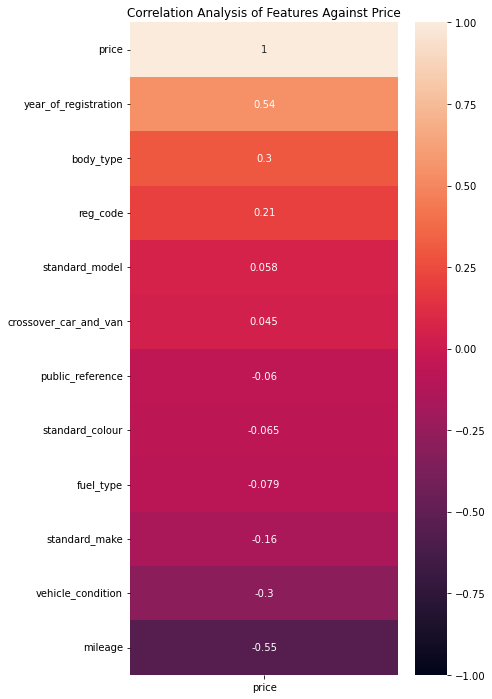

In [461]:
plt.figure(figsize=(6, 12))
heatmap = sns.heatmap(dataset_normalized.corr()[['price']].sort_values(by='price', ascending=False), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Analysis of Features Against Price')
plt.show()

## Feature Engineering

### mileage_type

In [462]:
dataset_normalized['mileage'].describe()

count   367557.00
mean         0.29
std          0.24
min          0.00
25%          0.10
50%          0.24
75%          0.45
max          1.00
Name: mileage, dtype: float64

In [463]:
def categorize_mileage(mileage):
    if mileage < 0.3:
        return 0
    elif mileage >= 0.3 and mileage < 0.6:
        return 1
    else:
        return 2

dataset_normalized['mileage_type'] = dataset_normalized['mileage'].apply(categorize_mileage)

In [464]:
dataset_normalized[['standard_make','mileage','mileage_type', 'price']]

,standard_make,mileage,mileage_type,price
1,38.00,0.86,2,0.18
2,77.00,0.06,0,0.36
3,89.00,0.36,1,0.20
4,44.00,0.51,1,0.70
5,5.00,0.13,0,0.75
...,...,...,...,...
402000,65.00,0.04,0,0.27
402001,65.00,0.87,2,0.05
402002,60.00,0.42,1,0.18
402003,0.00,0.08,0,0.29


### vehicle_age

In [465]:
def vehicle_age_calculation(year_of_registration):
    if pd.isnull(year_of_registration):
        return 0
    else:
        return (2022-year_of_registration)

dataset_normalized['vehicle_age'] = dataset_normalized['year_of_registration'].apply(vehicle_age_calculation)

In [466]:
# dataset = dataset.drop(['public_reference', 'reg_code', 'crossover_car_and_van', 'standard_model'], axis=1)
dataset_normalized[['mileage', 'price', 'year_of_registration', 'vehicle_age']]

,mileage,price,year_of_registration,vehicle_age
1,0.86,0.18,2011.00,11.00
2,0.06,0.36,2017.00,5.00
3,0.36,0.20,2016.00,6.00
4,0.51,0.70,2014.00,8.00
5,0.13,0.75,2017.00,5.00
...,...,...,...,...
402000,0.04,0.27,2019.00,3.00
402001,0.87,0.05,2009.00,13.00
402002,0.42,0.18,2012.00,10.00
402003,0.08,0.29,2015.00,7.00


# Model Building, Evaluation and Analysis

In [467]:
def prediction_residual_plotter(y_test, y_pred, model_name):
    residuals = y_test - y_pred

    # Plot the residuals
    plt.scatter(y_test, residuals)
    plt.xlabel('Actual values')
    plt.ylabel('Residuals')
    plt.title('Prediction Residual scatter plot of ' + model_name)
    plt.show()

Linear Regression: MAE 0.11371315999507008, MSE 0.02312994184259861, R2 0.45418546356250367
Decision Tree: MAE 0.04622048658486285, MSE 0.005332062008496606, R2 0.8741753449607208
Random Forest: MAE 0.035173871194488435, MSE 0.0028952253872619937, R2 0.9316792012109557


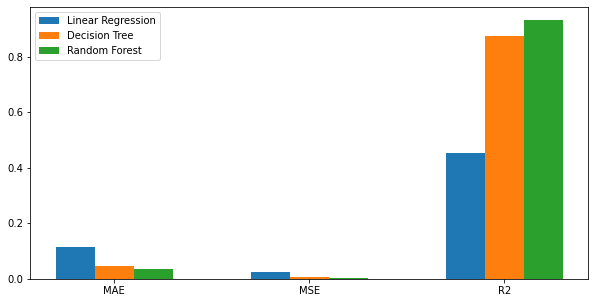

In [468]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

dataset_normalized_copy = dataset_normalized.copy(deep=True)
not_null_rows = dataset_normalized_copy[dataset_normalized_copy.notna().all(axis=1)]

# Assign the features and target
X = not_null_rows.drop(columns=['price'])
y = not_null_rows['price']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate the models
linear_regression = LinearRegression()
decision_tree = DecisionTreeRegressor()
random_forest = RandomForestRegressor()

# Train the models
linear_regression.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

# Predict on the test set
linear_predictions = linear_regression.predict(X_test)
dt_predictions = decision_tree.predict(X_test)
rf_predictions = random_forest.predict(X_test)

# Evaluate the models
linear_mae = mean_absolute_error(y_test, linear_predictions)
linear_mse = mean_squared_error(y_test, linear_predictions)
linear_r2 = r2_score(y_test, linear_predictions)

dt_mae = mean_absolute_error(y_test, dt_predictions)
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_r2 = r2_score(y_test, dt_predictions)

rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

# Compare the results
print(f'Linear Regression: MAE {linear_mae}, MSE {linear_mse}, R2 {linear_r2}')
print(f'Decision Tree: MAE {dt_mae}, MSE {dt_mse}, R2 {dt_r2}')
print(f'Random Forest: MAE {rf_mae}, MSE {rf_mse}, R2 {rf_r2}')

# Create a list of the evaluation metrics
metrics = ['MAE', 'MSE', 'R2']

# Create a list of the evaluation scores for each model
lin_reg_scores = [linear_mae, linear_mse, linear_r2]
dt_scores = [dt_mae, dt_mse, dt_r2]
rf_scores = [rf_mae, rf_mse, rf_r2]

# Create the bar plot
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)

# Set the bar width
bar_width = 0.2

# Set the position of the bars on the x-axis
bar_pos = np.arange(len(metrics))

# Create the bars
ax.bar(bar_pos, lin_reg_scores, bar_width, label='Linear Regression')
ax.bar(bar_pos + bar_width, dt_scores, bar_width, label='Decision Tree')
ax.bar(bar_pos + 2 * bar_width, rf_scores, bar_width, label='Random Forest')

# Set the x-axis labels
ax.set_xticks(bar_pos + bar_width)
ax.set_xticklabels(metrics)

# Add the legend
ax.legend()

# Show the plot
plt.show()

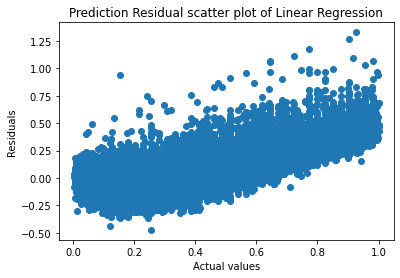

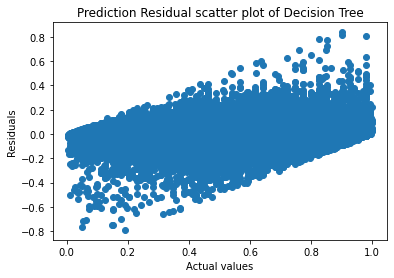

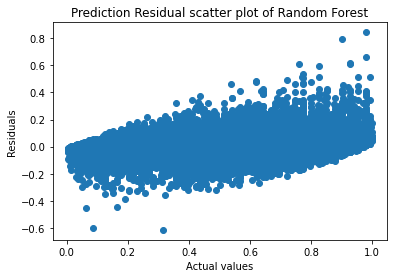

In [469]:
prediction_residual_plotter(y_test, linear_predictions, 'Linear Regression')
prediction_residual_plotter(y_test, dt_predictions, 'Decision Tree')
prediction_residual_plotter(y_test, rf_predictions, 'Random Forest')

In [470]:
dataset_normalized.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type,mileage_type,vehicle_age
1,202007020778260,0.86,31.00,2.00,38.00,943.00,1.00,2011.00,0.18,14.00,False,1.00,2,11.00
2,202007020778474,0.06,15.00,8.00,77.00,959.00,1.00,2017.00,0.36,13.00,False,5.00,0,5.00
3,202007080986776,0.36,14.00,4.00,89.00,591.00,1.00,2016.00,0.20,7.00,False,1.00,1,6.00
4,202007161321269,0.51,34.00,8.00,44.00,705.00,1.00,2014.00,0.70,13.00,False,1.00,1,8.00
5,202009304412074,0.13,15.00,2.00,5.00,735.00,1.00,2017.00,0.75,4.00,False,5.00,0,5.00


In [471]:
from sklearn.model_selection import cross_validate

# Linear Regression
lin_reg = LinearRegression()
lin_reg_cv_results = cross_validate(lin_reg, X, y, cv=5, scoring=['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2'])
lin_reg_mae = -1 * lin_reg_cv_results['test_neg_mean_absolute_error'].mean()
lin_reg_mse = -1 * lin_reg_cv_results['test_neg_mean_squared_error'].mean()
lin_reg_r2 = lin_reg_cv_results['test_r2'].mean()

# Decision Tree
dt = DecisionTreeRegressor()
dt_cv_results = cross_validate(dt, X, y, cv=5, scoring=['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2'])
dt_mae = -1 * dt_cv_results['test_neg_mean_absolute_error'].mean()
dt_mse = -1 * dt_cv_results['test_neg_mean_squared_error'].mean()
dt_r2 = dt_cv_results['test_r2'].mean()

# Random Forest
rf = RandomForestRegressor()
rf_cv_results = cross_validate(rf, X, y, cv=5, scoring=['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2'])
rf_mae = -1 * rf_cv_results['test_neg_mean_absolute_error'].mean()
rf_mse = -1 * rf_cv_results['test_neg_mean_squared_error'].mean()
rf_r2 = rf_cv_results['test_r2'].mean()

# Compare the performance of the models
print(f'Linear Regression: MAE {lin_reg_mae}, MSE {lin_reg_mse}, R2 {lin_reg_r2}')
print(f'Decision Tree: MAE {dt_mae}, MSE {dt_mse}, R2 {dt_r2}')
print(f'Random Forest: MAE {rf_mae}, MSE {rf_mse}, R2 {rf_r2}')

Linear Regression: MAE 0.11376019593810464, MSE 0.023146612458495013, R2 0.4529275564032245
Decision Tree: MAE 0.04619046580958681, MSE 0.005311763052189234, R2 0.8744444125381132
Random Forest: MAE 0.035158625991358924, MSE 0.002926503391283447, R2 0.9308288270226794


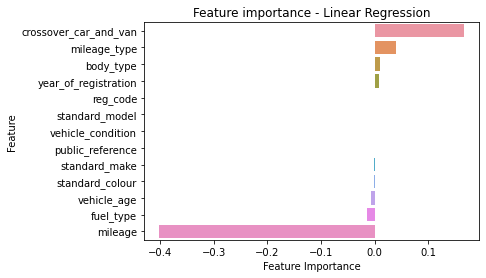

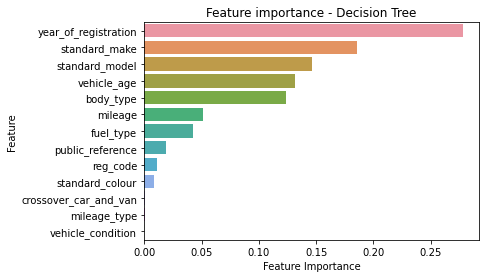

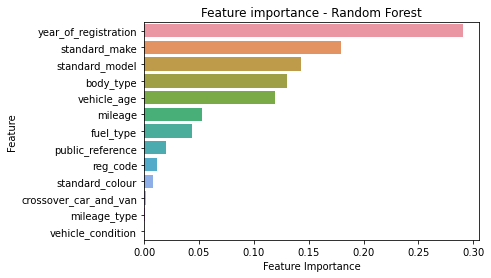

In [472]:
def model_feature_importance(importances, model_name):
    importances_df = pd.DataFrame({'feature': X_train.columns, 'importance': importances})

    # Sort the dataframe by importance
    importances_df = importances_df.sort_values(by='importance', ascending=False)

    # Plot the feature importances
    sns.barplot(x='importance', y='feature', data=importances_df)
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title('Feature importance - ' + model_name)
    plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = LinearRegression().fit(X_train, y_train)

model_feature_importance(model.coef_, 'Linear Regression')
model_feature_importance(decision_tree.feature_importances_, 'Decision Tree')
model_feature_importance(random_forest.feature_importances_, 'Random Forest')

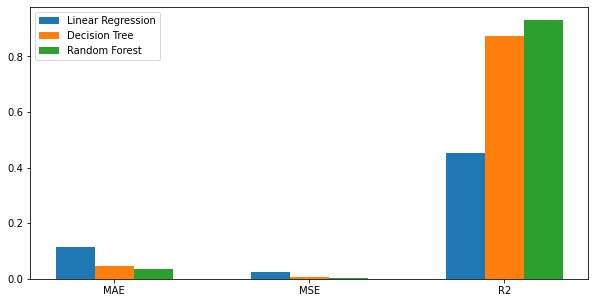

In [473]:
import matplotlib.pyplot as plt

# Create a list of the evaluation metrics
metrics = ['MAE', 'MSE', 'R2']

# Create a list of the evaluation scores for each model
lin_reg_scores = [lin_reg_mae, lin_reg_mse, lin_reg_r2]
dt_scores = [dt_mae, dt_mse, dt_r2]
rf_scores = [rf_mae, rf_mse, rf_r2]

# Create the bar plot
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)

# Set the bar width
bar_width = 0.2

# Set the position of the bars on the x-axis
bar_pos = np.arange(len(metrics))

# Create the bars
ax.bar(bar_pos, lin_reg_scores, bar_width, label='Linear Regression')
ax.bar(bar_pos + bar_width, dt_scores, bar_width, label='Decision Tree')
ax.bar(bar_pos + 2 * bar_width, rf_scores, bar_width, label='Random Forest')

# Set the x-axis labels
ax.set_xticks(bar_pos + bar_width)
ax.set_xticklabels(metrics)

# Add the legend
ax.legend()

# Show the plot
plt.show()

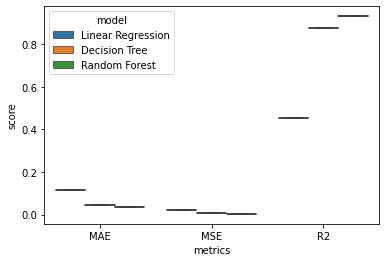

In [474]:
import seaborn as sns

#Create a dataframe that contains evaluation metrics of the models
df = pd.DataFrame({'model': ['Linear Regression']*3 + ['Decision Tree']*3 + ['Random Forest']*3,
                   'metrics': ['MAE', 'MSE', 'R2']*3,
                   'score': lin_reg_scores + dt_scores + rf_scores})

# Create the boxplot
sns.boxplot(x='metrics', y='score', hue='model', data=df)

# Show the plot
plt.show()


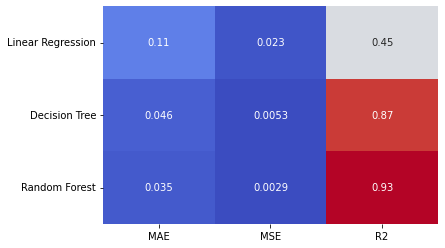

In [475]:
# Create a dataframe that contains the evaluation scores for each model and metric
scores_df = pd.DataFrame({'MAE': [lin_reg_mae, dt_mae, rf_mae],
                         'MSE': [lin_reg_mse, dt_mse, rf_mse],
                         'R2': [lin_reg_r2, dt_r2, rf_r2]},
                        index=['Linear Regression', 'Decision Tree', 'Random Forest'])

# Create the heatmap
sns.heatmap(scores_df, annot=True, cmap='coolwarm', cbar=False)

# Show the plot
plt.show()